### install and import Dependencies

In [1]:
# !pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

In [2]:
!cd yolov5 & pip install -r requirements.txt


^C


###  install libarary

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

### load the model 

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s') 

Using cache found in C:\Users\moham/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-5-4 torch 1.11.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


### Make detection with images


In [3]:
img = 'data/images/zidane.jpg'

In [4]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

In [5]:
img = 'data/images/zidane.jpg'

In [6]:
results = model(img)


In [7]:
results.print()

image 1/1: 720x1280 2 persons, 2 ties
Speed: 1129.9ms pre-process, 1686.9ms inference, 376.0ms NMS per image at shape (1, 3, 384, 640)


In [8]:
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,742.974915,48.395508,1141.844482,720.000000,0.881053,0,person
1,442.007629,437.522400,496.653992,709.973572,0.675213,27,tie
2,123.024139,193.287354,715.662231,719.723877,0.665813,0,person
3,982.803162,308.417358,1027.365845,419.987000,0.260076,27,tie


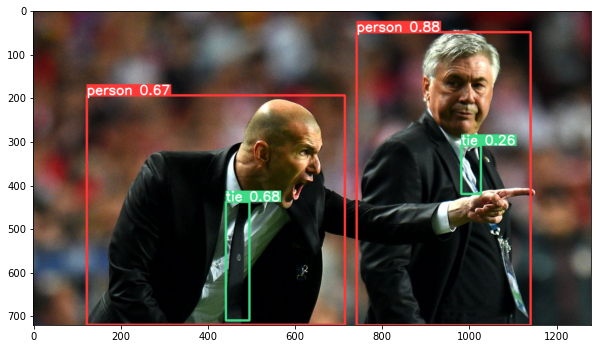

In [9]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.imshow(np.squeeze(results.render()))
plt.show()

In [10]:
results.render()

[array([[[72, 48, 38],
         [74, 50, 40],
         [73, 51, 40],
         ...,
         [56, 21, 25],
         [54, 20, 21],
         [51, 15, 17]],
 
        [[71, 47, 37],
         [71, 47, 37],
         [70, 48, 37],
         ...,
         [55, 20, 24],
         [52, 16, 18],
         [47, 11, 13]],
 
        [[75, 51, 41],
         [72, 50, 39],
         [70, 48, 37],
         ...,
         [56, 20, 24],
         [52, 16, 20],
         [48, 12, 16]],
 
        ...,
 
        [[40, 43, 48],
         [41, 44, 49],
         [40, 43, 48],
         ...,
         [35, 49, 49],
         [35, 49, 49],
         [36, 50, 50]],
 
        [[39, 42, 47],
         [39, 42, 49],
         [39, 42, 49],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]],
 
        [[38, 41, 48],
         [38, 41, 48],
         [38, 41, 48],
         ...,
         [35, 49, 50],
         [35, 49, 50],
         [36, 50, 51]]], dtype=uint8)]

### Real Time detection

In [11]:
cap = cv2.VideoCapture()
while cap.isOpened():
    ret, frame = cap.read()
    # Make detection 
    results= model(frame) 
    
    cv2.imshow('YOLO',np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

### train from scratch

In [17]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    # Make detection 
    results= model(frame) 
    
    cv2.imshow('YOLO',np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()